In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'data/BenchmarkingSample20230607_with_features.csv'
df = pd.read_csv(file_path)
df

,Unit,Date,Days,Period,Advertising,Cost of Sales - Food,Cost of Sales - Paper,Crew Labor,Maintenance & Repair,Management Labor,...,Total Cost of Sales,Gross Profit,Total Labor,Total Prime Costs,Total Controllable Costs,Controllable Profit,Total Non-controllable Costs,Store EBITDA,Adjusted daily Rent,Average Daily Cost
0,00040302CD88,2021-04-30,30,1,3778,20557,2190,486,5135,3983,...,22747,67205,7898,30645,34531,32674,22747,9927,15.003333,2060.983333
1,00040302CD88,2021-05-31,31,2,3805,20876,2058,1376,1553,4255,...,22934,67660,9330,32264,29278,38382,22934,15448,15.003333,1831.933333
2,00040302CD88,2021-06-30,30,3,3440,19531,2291,178,2321,4241,...,21822,60087,8033,29855,27747,32340,21822,10518,15.003333,1801.663333
3,00040302CD88,2021-07-31,31,4,3672,20999,2056,36597,3412,5515,...,23055,64363,49056,72111,71261,-6898,23055,-29953,15.003333,3182.123333
4,00040302CD88,2021-08-31,31,5,3827,21357,2312,29942,3345,5484,...,23669,67440,42535,66204,64950,2490,23669,-21179,15.003333,2956.193333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0004030BEB57,2022-11-30,30,20,15729,99236,10557,75243,8789,3997,...,109793,264704,94918,204711,139868,124836,109793,15043,2175.308333,10862.118333
212,0004030BEB57,2022-12-31,31,21,12227,108507,13137,94509,1704,4989,...,121644,303041,114744,236388,156370,146671,121644,25027,2175.308333,12018.358333
213,0004030BEB57,2023-01-31,31,22,15255,101713,10812,82894,3256,4278,...,112525,250680,103340,215865,148349,102331,112525,-10194,2175.308333,11006.238333
214,0004030BEB57,2023-02-28,28,23,15020,98547,11558,83338,3605,5253,...,110105,247506,105045,215150,141023,106483,110105,-3622,2175.308333,11607.698333


In [3]:
df2 = df.groupby('Unit')['Total Cost of Sales','Gross Profit'].mean()
df2['Categorical'] = [1, 2, 3] * 3
df2.to_csv('data/BenchmarkingSample20230607_with_features_by_unit.csv')

/var/folders/tw/9b4vt9tx33x1388qrfs12vx40000gn/T/ipykernel_65782/4020844600.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2 = df.groupby('Unit')['Total Cost of Sales','Gross Profit'].mean()


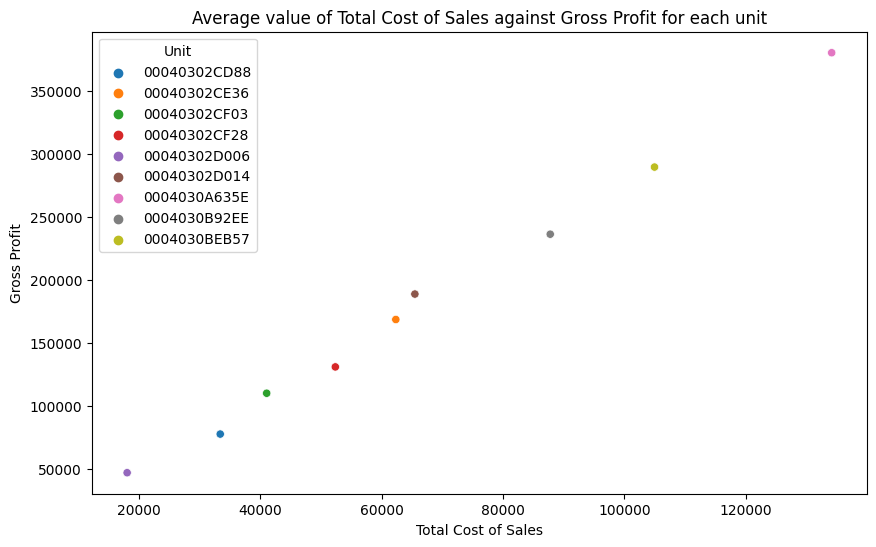

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Total Cost of Sales', y='Gross Profit', hue='Unit')
plt.title('Average value of Total Cost of Sales against Gross Profit for each unit')
plt.show()

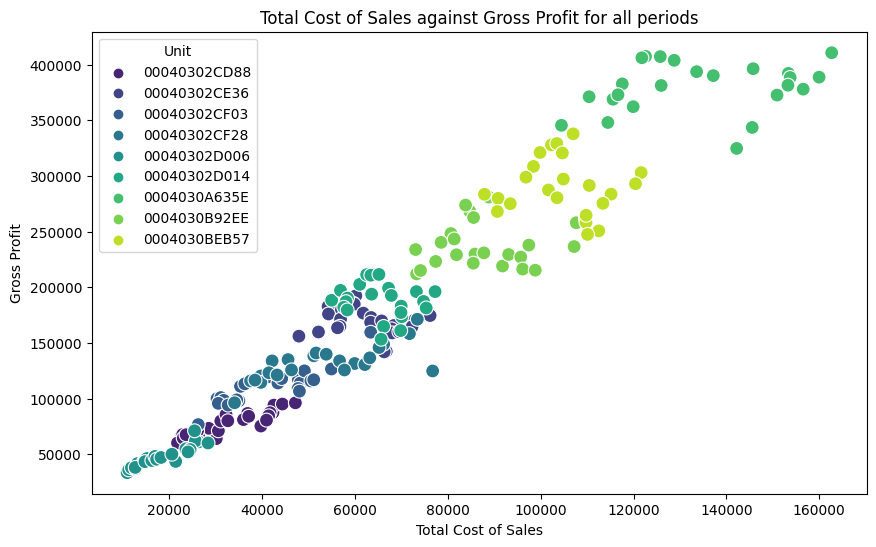

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Total Cost of Sales', y='Gross Profit', hue='Unit', palette='viridis', s=100)
plt.title('Total Cost of Sales against Gross Profit for all periods')
plt.show()

# Comparison of effciency across all DMUs


In [6]:
# import pyDEA
from pyDEA.core.data_processing.parameters import parse_parameters_from_file
from pyDEA.core.utils.run_routine import RunMethodTerminal

In [7]:
filename = 'data/DEA_parameters.txt'
params = parse_parameters_from_file(filename)
params.print_all_parameters()
runMethod = RunMethodTerminal(params, "", ".txt", "solutions")
runMethod.run(params)

<DATA_FILE> = data/BenchmarkingSample20230607_with_features_by_unit.csv
<INPUT_CATEGORIES> = Gross Profit
<OUTPUT_CATEGORIES> = Total Cost of Sales
<DEA_FORM> = env
<RETURN_TO_SCALE> = VRS
<ORIENTATION> = output
<NON_DISCRETIONARY_CATEGORIES> = Total Cost of Sales
<WEAKLY_DISPOSAL_CATEGORIES> = Total Cost of Sales
<USE_SUPER_EFFICIENCY> = ''
<ABS_WEIGHT_RESTRICTIONS> = Total Cost of Sales >= 0
<VIRTUAL_WEIGHT_RESTRICTIONS> = Total Cost of Sales >= 0
<PRICE_RATIO_RESTRICTIONS> = Gross Profit/Gross Profit >= 1
<MAXIMIZE_SLACKS> = ''
<MULTIPLIER_MODEL_TOLERANCE> = 0
<OUTPUT_FILE> = data/solution.csv
<CATEGORICAL_CATEGORY> = Categorical
<PEEL_THE_ONION> = ''
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/aaditkamat/.pyenv/versions/3.11.2/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/tw/9b4vt9tx33x1388qrfs12vx40000gn/T/404414e5dfc9443da1c1354300ccd687-pulp.mps max timeMode elapsed branch printingOptions all solution

/Users/aaditkamat/.pyenv/versions/3.11.2/lib/python3.11/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/aaditkamat/.pyenv/versions/3.11.2/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/tw/9b4vt9tx33x1388qrfs12vx40000gn/T/307a67a7fbfe4477a137cee91f3eca65-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/tw/9b4vt9tx33x1388qrfs12vx40000gn/T/307a67a7fbfe4477a137cee91f3eca65-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 8 COLUMNS
At line 18 RHS
At line 22 BOUNDS
At line 23 ENDATA
Problem MODEL has 3 rows, 4 columns and 7 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
0  Obj -0 Primal inf 6.4584628 (3) Dual inf 131080.29 (1)
0  Obj -0 Primal inf 6.4584628 (3) Dual inf 5.232462e+10 (2)
1  Obj -0 Primal inf 1.8990035 (2)
Primal infeasible - obj

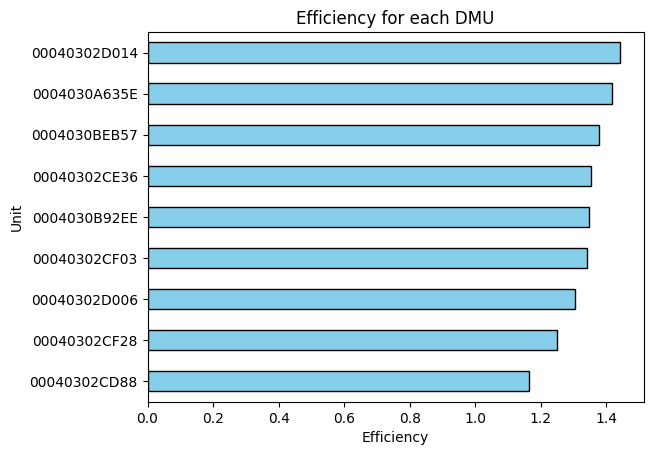

In [8]:
import matplotlib.pyplot as plt

# Calculate the efficiency for each DMU
best_ind = 2
df2['Efficiency'] = df2['Gross Profit'] / (df2['Total Cost of Sales'] * np.array(best_ind))

# Sort DataFrame by 'Efficiency' column from high to low
df2 = df2.sort_values(by='Efficiency', ascending=False)

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot efficiencies
df2['Efficiency'].plot(kind='barh', ax=ax, color='skyblue', edgecolor='k')

# Invert y-axis to have units in descending order
ax.invert_yaxis()

# Set labels and title
ax.set_xlabel('Efficiency')
ax.set_ylabel('Unit')
ax.set_title('Efficiency for each DMU')

# Show the plot
plt.show()
